In [1]:
import urllib.request as urllib2
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

#### Downloading data of the book "The Metamorphosis" from the website

In [2]:
response = urllib2.urlopen('http://www.gutenberg.org/cache/epub/5200/pg5200.txt')
data = response.read()

data = data.decode('UTF-8') 
my_list1 = (word_tokenize(data))

In [3]:
list_up = [x.upper() for x in my_list1] 
for i in list_up:
    for punct in string.punctuation:
        if i == punct:
            list_up.remove(i)
for j in list_up:
    if j == '``':
        list_up.remove(j)

In [4]:
print(len(list_up))
print(len(my_list1))

25585
28456


In [5]:
my_dict = {"word" : [] , "num" : []}
for i in list_up:
    my_dict["word"].append(i)
    my_dict["num"].append(list_up.count(i))

In [6]:
df = pd.DataFrame(my_dict)
df = df.sort_values(by ="num" , ascending = False )
df = df.drop_duplicates(subset ="word")

In [7]:
df["rank"] =[index for index in range(1, len(df.word)+1)]

## The graph represent that the variables are inversely proportional

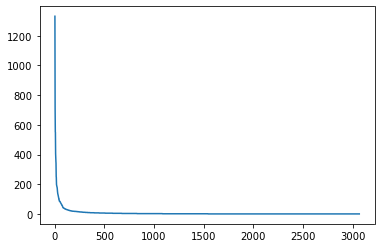

In [8]:
plt.plot(df["rank"] , df["num"])

##  F (Frequency) =  K(constant) ⁄ R(Rank in the frequency table)  
## log(F) = log(K) – log(R)
## log(F) +  log(R) = log(K) 
### this is the formula of straight line graph ( y = mx +c )

In [9]:
logofnum = [math.log(i) for i in df.num]
logofrank = [math.log(i) for i in range(1,3067)]

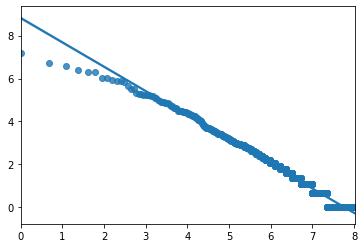

In [10]:
sns.regplot(data=df , x =logofrank, y= logofnum)
